## Machine Learning Algorithm
- 지도 학습 Supervised Learning
- 비지도 학습 Unsuoervised Learning
- 강화 학습 Reinforcementt Learning

### 지도 학습 Supervised Learning

#### k-NN (k-Nearest Neighbor)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # classifier : 분류

$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    5 & 6 \\
    7 & 8 \\
    8 & 9 \\
    \end{pmatrix}
$$

In [43]:
# X_train = np.array([
#     [1,2],
#     [2,3],
#     [3,4],
#     [6,7],
#     [7,8],
#     [8,9],
# ])

# 모델 훈련용 데이터
X_train = np.array([[i, i+1] for i in range(1,9) if i not in(4,5)])
y_train = np.array([0,0,0,1,1,1])
X_train

array([[1, 2],
       [2, 3],
       [3, 4],
       [6, 7],
       [7, 8],
       [8, 9]])

In [44]:
# 모델 테스트용 데이터
X_test = np.array([[6,5]])
X_test

array([[6, 5]])

In [45]:
# k-NN setting
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Test
predicted_label = knn.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

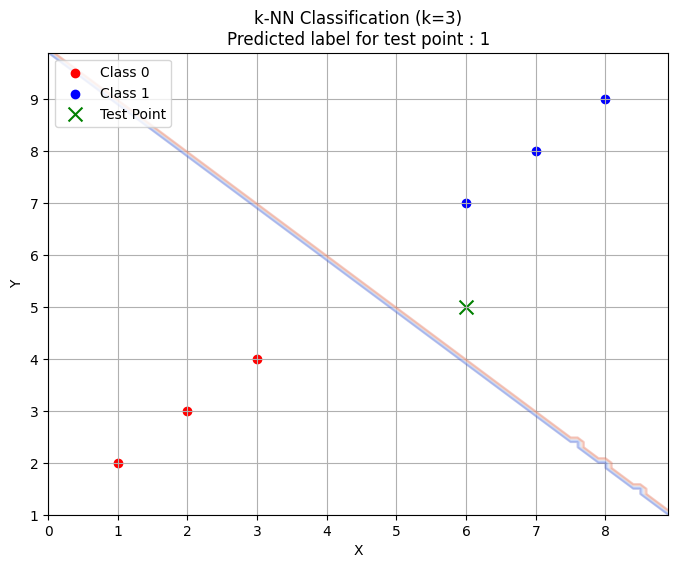

In [47]:
plt.figure(figsize=(8,6))
for i, point in enumerate(X_train): # 데이터의 인덱스 번호를 반환
    plt.scatter(point[0],point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 3 else ''))

plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label ='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx,yy,Z, alpha = 0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'k-NN Classification (k={K})\nPredicted label for test point : {predicted_label[0]}')
plt.grid(True)
plt.show

### SVM(Support Vector Machine)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs # 더미데이터


In [67]:
# 복잡한 샘플 생성
X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2)

# 테스트 데이터
X_test = np.array([[0,0]])

In [68]:
# 모델 생성
svm_model= svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [69]:
# 예측
predicted_label = svm_model.predict(X_test)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9252\534954546.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='k')


<function matplotlib.pyplot.show(close=None, block=None)>

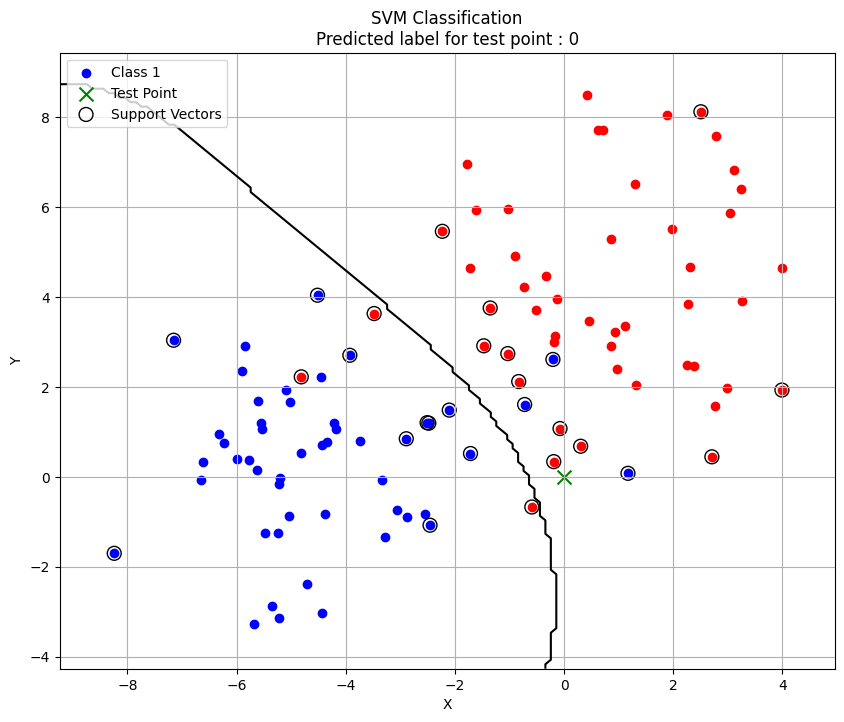

In [70]:
# 시각화
plt.figure(figsize=(10,8))
for i, point in enumerate(X_train): # 데이터의 인덱스 번호를 반환
    plt.scatter(point[0],point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label ='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:, 0],svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label = 'Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'SVM Classification\nPredicted label for test point : {predicted_label[0]}')
plt.grid(True)
plt.show


In [71]:
# scatter visualize function
def scatter_vis(X_train,y_train,X_test,model,figsize=(6,6)):
    '''_summary_
    Args:
        X_train(_type_) : 훈련 데이터 셋
        y_train(_type_) : 훈련 데이터 레이블
        X_test(_type_) : 테스트용 데이터
        model (_type_) : 만든 머신러닝 모델 작성
        figsize (tuple,optional) : _description_. Defaults to (6,6).
    '''
    
    plt.figure(figsize=figsize)
    for i, point in enumerate(X_train): # 데이터의 인덱스 번호를 반환
        plt.scatter(point[0],point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

    plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label ='Test Point')

    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    return xx, yy, Z




C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9252\3951485211.py:2: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='k')


<function matplotlib.pyplot.show(close=None, block=None)>

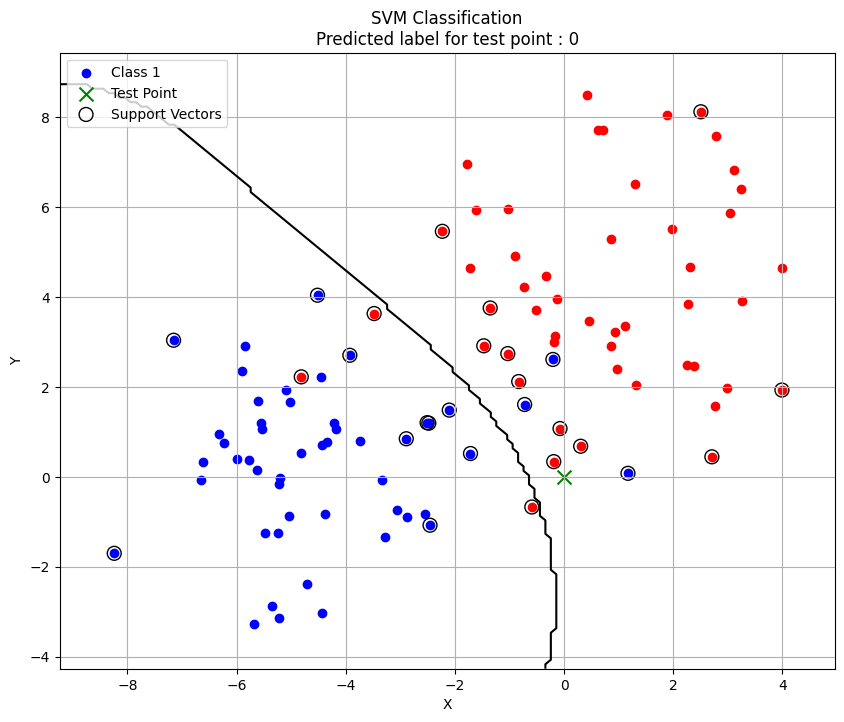

In [72]:
scatter_vis(X_train, y_train, X_test, svm_model, figsize=(10,8))
plt.contour(xx,yy,Z, levels=[0], linewidth=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:, 0],svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label = 'Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'SVM Classification\nPredicted label for test point : {predicted_label[0]}')
plt.grid(True)
plt.show

### Decision Tree

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [74]:
# 복잡한 샘플 데이터 생성
X_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 테스트 데이터
X_test = np.array([[0,0]])

In [75]:
# DC tree 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
# 예측
predicted_label = tree_model.predict(X_test)

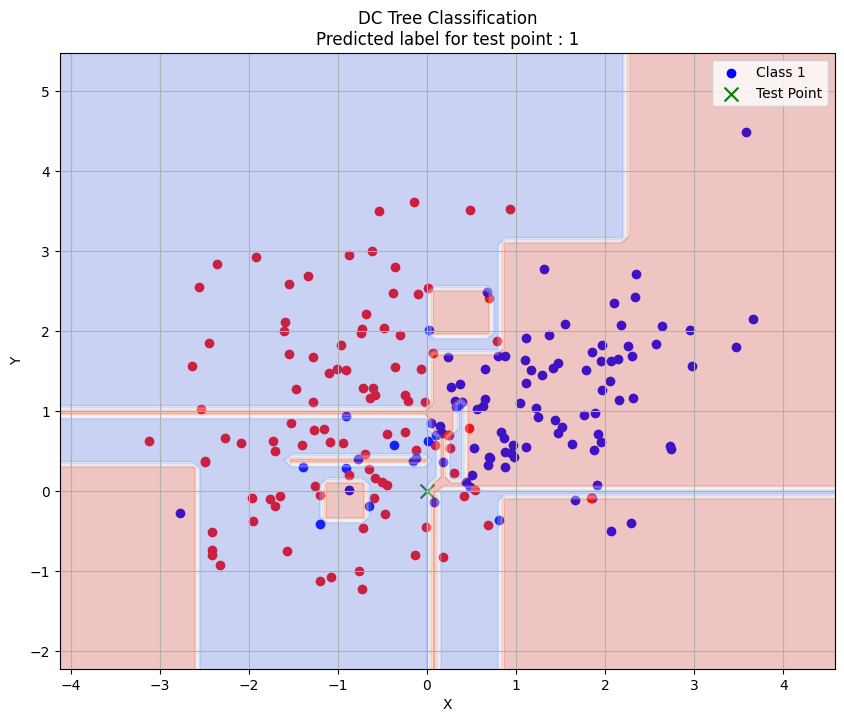

In [80]:
# 시각화
plt.figure(figsize=(10,8))
for i, point in enumerate(X_train): # 데이터의 인덱스 번호를 반환
    plt.scatter(point[0],point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0,0], X_test[0,1], c='g', marker='x', s=100, label ='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'DC Tree Classification\nPredicted label for test point : {predicted_label[0]}')
plt.grid(True)
plt.show()


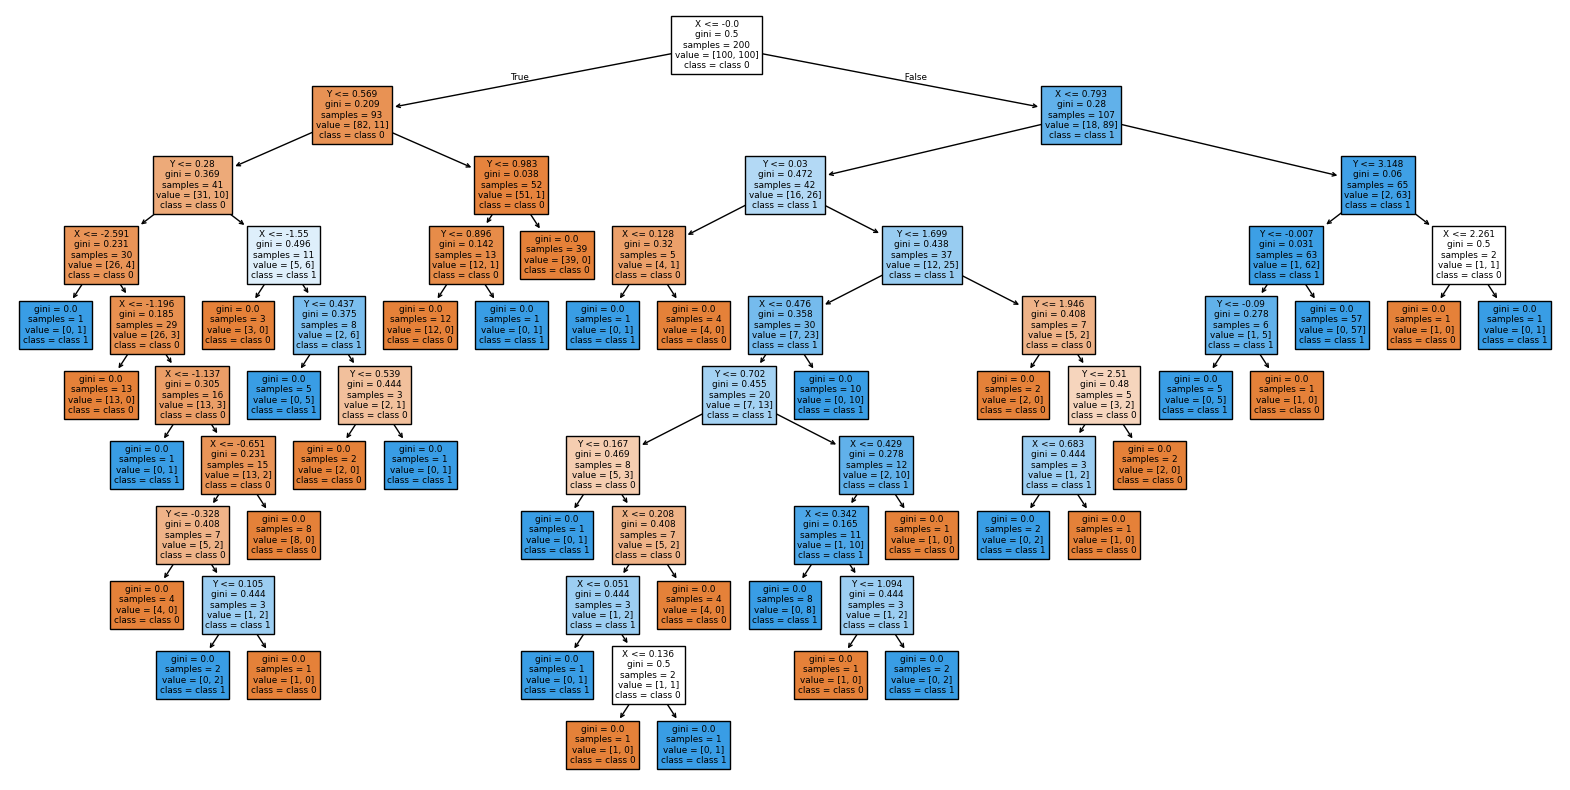

In [81]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['X','Y'], class_names=['class 0','class 1'])
plt.show()

## 비지도 학습 Unsupervised Learning

### k-means clustering
- k : 군집(클러스터)의 개수

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [84]:
# 데이터 불러오기
iris = load_iris()
X = iris.data

In [85]:
# 데이터 전처리 - 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [92]:
labels = kmeans.labels_ # label이 아닌 cluster 값


In [93]:
# PCA(Principle Component Analysis, 주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca =  pca.fit_transform(X_scaled)

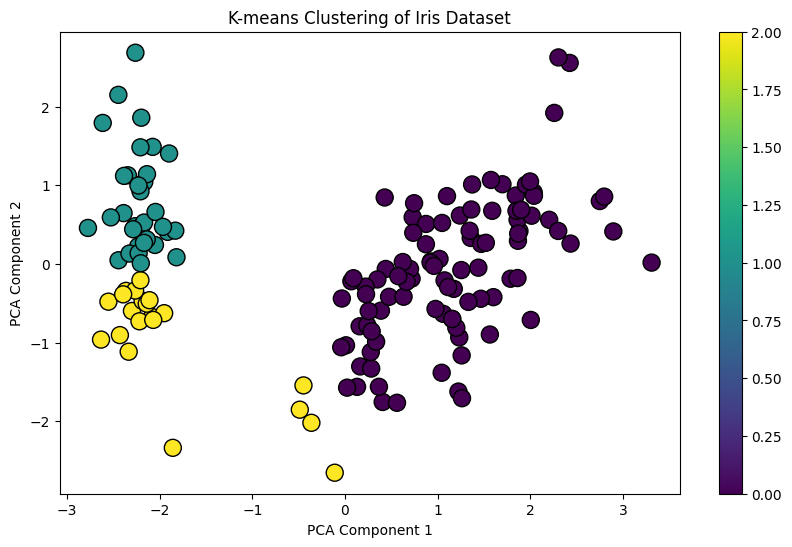

In [94]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolors='k', s=150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [1]:
# Random data로 k-means clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

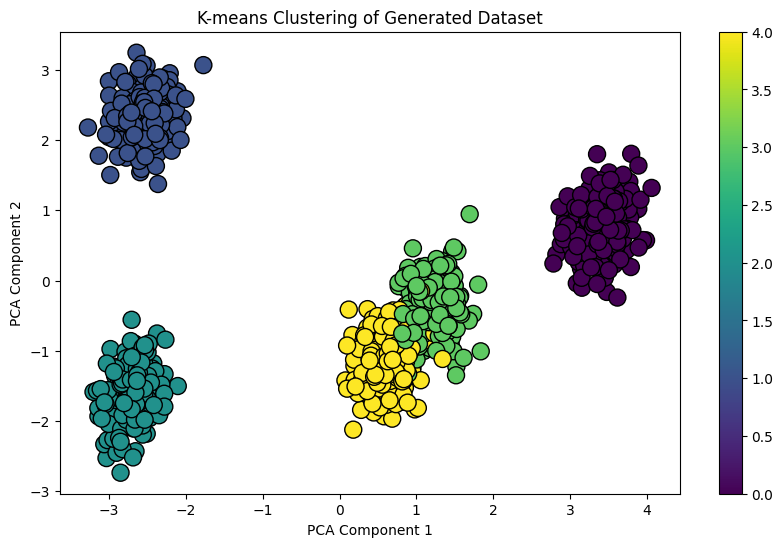

In [3]:
# 데이터 생성
n_samples = 1000
n_features = 10
n_clusters = 5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolors='k', s=150)
plt.title('K-means Clustering of Generated Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()